# 1. EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
game = pd.read_csv('vgames2.csv', index_col = 0)
sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
game.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [3]:
# Year, Genre, Publisher null rows
game.info()
game.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [4]:
# Since enough data exist will remove all data with null values
# It is hard to assume which genre it will go in for
# For Example the Game Series Need for speed is in Action or Racing Depending on its series.

In [5]:
game_clean = game.copy()

## 1 - 1 Remove Missing Values

In [6]:
game_clean = game_clean.dropna(subset = ['Year' ,'Genre', 'Publisher'])
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  object 
 6   EU_Sales     16241 non-null  object 
 7   JP_Sales     16241 non-null  object 
 8   Other_Sales  16241 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


## 1 - 2 Sales Column

In [7]:
# game_clean = game_clean.astype({'NA_Sales' : 'float64', 'EU_Sales' : 'float64' ,'JP_Sales' : 'float64', 'Other_Sales' : 'float64'})
# game_clean.info()
# M/K exits in our data set.
# sales column에 있는 정보들은 출고량이라고 한다.
# 과연 0으로 표기 되있는 출고량들은 k 혹은 m의 단위로 소수점을 지우다가 0이 된것일까
# 아니면 진짜로 특정 지역에서 출고를 하지 않은 것일까

In [8]:
def check_num_sales(df, col):
    num_k = df[col].str.contains('K').sum()
    num_m = df[col].str.contains('M').sum()
    num_0 = len(df[df[col] == '0'])
    non_k_m_0 = df[(~df[col].str.contains('K')) & 
                       (~df[col].str.contains('M')) & 
                       (~(df[col] == '0'))]
    num_float = non_k_m_0[col].str.contains('.').sum()
    num_non_k_m_0 = len(non_k_m_0)
    
    total = num_k + num_m + num_0 + num_non_k_m_0
    
    print('num K : ', num_k)
    print('num M : ', num_m)
    print('num 0 : ', num_0)
    print('num non K M 0 : ', num_non_k_m_0)
    print('num not k m 0 float : ', num_float)
    print('Sum : ', total, ' Expected : ', len(df))

In [9]:
for col in sales_col:
    print(col)
    check_num_sales(game_clean, col)
    print()

NA_Sales
num K :  94
num M :  97
num 0 :  4367
num non K M 0 :  11683
num not k m 0 float :  11683
Sum :  16241  Expected :  16241

EU_Sales
num K :  98
num M :  97
num 0 :  5543
num non K M 0 :  10503
num not k m 0 float :  10503
Sum :  16241  Expected :  16241

JP_Sales
num K :  98
num M :  98
num 0 :  10054
num non K M 0 :  5991
num not k m 0 float :  5991
Sum :  16241  Expected :  16241

Other_Sales
num K :  97
num M :  100
num 0 :  6229
num non K M 0 :  9815
num not k m 0 float :  9815
Sum :  16241  Expected :  16241



In [10]:
# Any row with K is in unit of 10 and greater than 10 except 0 as sales

game_clean[game_clean['NA_Sales'].str.contains('K')]
game_clean[game_clean['EU_Sales'].str.contains('K')]
game_clean[game_clean['JP_Sales'].str.contains('K')]
game_clean[game_clean['Other_Sales'].str.contains('K')]

# Any row with M has a value smaller than 10
game_clean[game_clean['NA_Sales'].str.contains('M')]
game_clean[game_clean['EU_Sales'].str.contains('M')]
game_clean[game_clean['JP_Sales'].str.contains('M')]
game_clean[game_clean['Other_Sales'].str.contains('M')]


print(game_clean['NA_Sales'].str.contains('M').sum())
print(game_clean['EU_Sales'].str.contains('M').sum())
print(game_clean['JP_Sales'].str.contains('M').sum())
print(game_clean['Other_Sales'].str.contains('M').sum())

97
97
98
100


In [11]:
# 1. K가 붙어야되는것들 찾기
# 2. K 붙여주고 갯수 확인하기
# 3. K 000으로 바꿔주기


# k를 가지고 있는 index 저장해두기
# k대신 000 만들어주고
# m 지워주고 
# k 대신 000 써줬던 index 다시 1000으로 나눠주기

In [12]:
def replace_k(df, col):
    k_index = df[col].str.contains('K')
    df[col] = df[col].str.replace('K', '000')
    df[col] = df[col].str.replace('M', '')
    df[col] = df[col].astype('float64')
    df.loc[k_index, col] = df.loc[k_index, col] / 1000000

In [13]:
for col in sales_col:
    replace_k(game_clean, col)

In [14]:
game_clean['Total_Sales'] = game_clean['NA_Sales'] + game_clean['EU_Sales'] + game_clean['JP_Sales'] + game_clean['Other_Sales']
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


## 1 - 2 Year Column float -> int

In [15]:
game_clean['Year'] = game_clean['Year'].astype('int')
game_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 1 to 16598
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [16]:
game_clean[(game_clean['Year'] < 100) & (game_clean['Year'] >= 22)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
82,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,0.18
907,Mini-Yonku Shining Scorpion: Let's & Go!!,SNES,96,Racing,ASCII Entertainment,0.00,0.00,0.90,0.00,0.90
2430,Casper,PS,96,Adventure,Interplay,0.46,0.31,0.00,0.05,0.82
3493,Glover,N64,98,Platform,Hasbro Interactive,0.72,0.17,0.00,0.01,0.90
4366,Adventure Island,NES,86,Platform,Hudson Soft,0.00,0.00,1.05,0.00,1.05
4808,Virtua Cop,SAT,95,Shooter,Sega,0.00,0.00,0.62,0.00,0.62
4840,Mobile Suit Gundam,PS,95,Action,Namco Bandai Games,0.00,0.00,0.42,0.03,0.45
10316,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0.00,0.00,0.19
10706,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,0.03
11335,Super Fire ProWrestling X,SNES,95,Fighting,Human Entertainment,0.00,0.00,0.28,0.00,0.28


In [17]:
game_clean.loc[(game_clean['Year'] < 100) & (game_clean['Year'] >= 22), 'Year'] += 1900

In [18]:
game_clean[(game_clean['Year'] < 21) & (game_clean['Year'] >= 0)]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
75,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0.00,0.03,0.16
214,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0.00,0.00,0.01,0.10
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0.00,0.02,0.00,0.00,0.02
769,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0.00,0.14,1.08
1016,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0.00,0.01,0.05
...,...,...,...,...,...,...,...,...,...,...
15613,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0.00,0.02,0.13
15837,Theatrhythm Dragon Quest,3DS,15,Misc,Square Enix,0.00,0.00,0.15,0.00,0.15
16104,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0.00,0.00,0.00,0.01
16150,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05,0.50


In [19]:
game_clean.loc[(game_clean['Year'] < 22) & (game_clean['Year'] >= 0), 'Year'] += 2000

## Explore

In [20]:
game_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [21]:
game_clean.nunique()

Name           11295
Platform          31
Year              39
Genre             12
Publisher        575
NA_Sales         407
EU_Sales         303
JP_Sales         241
Other_Sales      156
Total_Sales     1004
dtype: int64

In [22]:
game_clean[game_clean.duplicated(['Name'], keep = False)].sort_values('Name')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
9466,007: Quantum of Solace,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.13
6840,007: Quantum of Solace,PS3,2008,Action,Activision,0.43,0.52,0.02,0.20,1.17
8868,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.02
5505,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
16281,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49
...,...,...,...,...,...,...,...,...,...,...
2710,pro evolution soccer 2011,X360,2010,Sports,Konami Digital Entertainment,0.09,0.44,0.00,0.07,0.60
11281,pro evolution soccer 2011,PSP,2010,Sports,Konami Digital Entertainment,0.05,0.30,0.29,0.16,0.80
16252,pro evolution soccer 2011,PS2,2010,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11,0.41
3063,uDraw Studio: Instant Artist,X360,2011,Misc,THQ,0.01,0.01,0.00,0.00,0.02


In [23]:
game_clean.to_csv('vgames2_clean.csv')

## Outliers

In [24]:
# Sales Outlier
na = game_clean['NA_Sales'] == 0
eu = game_clean['EU_Sales'] == 0
jp = game_clean['JP_Sales'] == 0
other = game_clean['Other_Sales'] == 0
total = game_clean['Total_Sales'] == 0
at_least_one = game_clean[na | eu | jp | other]

print('NA Sales 0 : ', na.sum())
print('EU Sales 0 : ', eu.sum())
print('JP Sales 0 : ', jp.sum())
print('Other Sales 0 : ', other.sum())
print('At least one Sales 0 : ', len(at_least_one))
print('Total Sales 0 : ', total.sum())

NA Sales 0 :  4421
EU Sales 0 :  5607
JP Sales 0 :  10173
Other Sales 0 :  6319
At least one Sales 0 :  13886
Total Sales 0 :  1


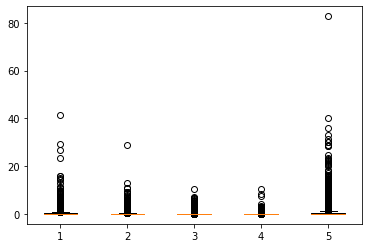

In [28]:
fig, ax = plt.subplots()
ax.boxplot(game_clean[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']])
plt.show()

In [29]:
game_clean.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000,16241.000000
mean,2006.406748,0.265195,0.147378,0.078283,0.048234,0.539091
std,5.832087,0.822431,0.508340,0.309272,0.189678,1.563905
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [30]:
q1 = game_clean['Total_Sales'].describe()['25%']
q3 = game_clean['Total_Sales'].describe()['75%']
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
game_total_outlier = game_clean[(game_clean['Total_Sales'] <= upper) & (game_clean['Total_Sales'] >= lower)]
game_total_outlier = game_total_outlier[game_total_outlier['Total_Sales'] <= 0.7]
len(game_total_outlier)

13381

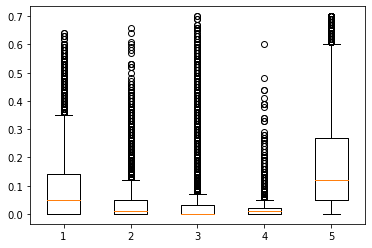

In [31]:
fig, ax = plt.subplots()
ax.boxplot(game_total_outlier[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']])
plt.show()

In [32]:
game_total_outlier.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000,13381.000000
mean,2006.700994,0.091170,0.042101,0.035715,0.014334,0.183320
std,5.494546,0.113334,0.067404,0.085835,0.025808,0.171154
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.050000
50%,2008.000000,0.050000,0.010000,0.000000,0.010000,0.120000
75%,2010.000000,0.140000,0.050000,0.030000,0.020000,0.270000
max,2020.000000,0.640000,0.660000,0.700000,0.600000,0.700000


In [33]:
q1 = game_clean['NA_Sales'].describe()['25%']
q3 = game_clean['NA_Sales'].describe()['75%']
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
game_indv = game_clean[(game_clean['NA_Sales'] <= upper) & (game_clean['NA_Sales'] >= lower)]
# game_total_outlier = game_total_outlier[game_total_outlier['Total_Sales'] <= 0.7]
len(game_indv)

14591

In [34]:
q1 = game_clean['EU_Sales'].describe()['25%']
q3 = game_clean['EU_Sales'].describe()['75%']
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
game_indv = game_indv[(game_indv['EU_Sales'] <= upper) & (game_indv['EU_Sales'] >= lower)]
# game_total_outlier = game_total_outlier[game_total_outlier['Total_Sales'] <= 0.7]
len(game_indv)

13673

In [35]:
q1 = game_clean['JP_Sales'].describe()['25%']
q3 = game_clean['JP_Sales'].describe()['75%']
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
game_indv = game_indv[(game_indv['JP_Sales'] <= upper) & (game_indv['JP_Sales'] >= lower)]
# game_total_outlier = game_total_outlier[game_total_outlier['Total_Sales'] <= 0.7]
len(game_indv)

11857

In [36]:
q1 = game_clean['Other_Sales'].describe()['25%']
q3 = game_clean['Other_Sales'].describe()['75%']
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr
game_indv = game_indv[(game_indv['Other_Sales'] <= upper) & (game_indv['Other_Sales'] >= lower)]
# game_total_outlier = game_total_outlier[game_total_outlier['Total_Sales'] <= 0.7]
len(game_indv)

11732

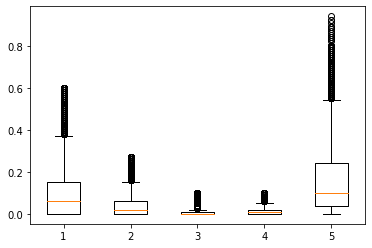

In [37]:
fig, ax = plt.subplots()
ax.boxplot(game_indv[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total_Sales']])
plt.show()

In [38]:
game_indv.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
count,11732.000000,11732.000000,11732.000000,11732.000000,11732.000000,11732.000000
mean,2006.953546,0.100898,0.041559,0.010459,0.013147,0.166063
std,5.213682,0.120723,0.058885,0.022307,0.018507,0.167932
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.040000
50%,2008.000000,0.060000,0.020000,0.000000,0.010000,0.100000
75%,2010.000000,0.150000,0.060000,0.010000,0.020000,0.240000
max,2020.000000,0.600000,0.270000,0.100000,0.100000,0.940000


In [39]:
game_clean[game_clean['NA_Sales'] == game_clean['NA_Sales'].max()]
game_clean[game_clean['JP_Sales'] == game_clean['JP_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7830,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.38


In [40]:
game_clean[game_clean['EU_Sales'] == game_clean['EU_Sales'].max()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2909,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
